<a href="https://colab.research.google.com/github/wooookim/ML-DL/blob/main/15_%ED%86%B5%EA%B3%84%EC%A0%81_%EC%B6%94%EB%A1%A0(1_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
모수검정(parametric test)
- 모집단(population)에 대한 파라미터를 추정하는 방법

표준점수(standard score)
- 데이터가 정규분포를 따른다고 가정하고, 각 값이 평균에서 얼마나 떨어져 있는지 표준편차를 사용해 변환
- (= z score)
- z = (x - 모집단 평균) / (모집단 표준편차)
'''

In [1]:
import numpy as np
x = [0, 3, 5, 7, 10]

s = np.std(x)
m = np.mean(x)
z = (7 - m) / s
print(z)

0.5872202195147035


In [2]:
'''
scipy 모듈 활용
'''
from scipy import stats

# x의 모든 원소에 대한 z 값
stats.zscore(x)

array([-1.46805055, -0.58722022,  0.        ,  0.58722022,  1.46805055])

In [ ]:
'''
표준정규분포
- x축에서 0이 중앙
- 평균이 0이고 표준편차가 1인 정규분포
- z = x
- 표준정규분포에서 z값이 각 1, 2인경우 각 68%, 95%에 해당됨
'''

In [3]:
'''
누적분포 반환
'''
# z값이 0까지 분포의 비율 반환
stats.norm.cdf(0)

0.5

In [4]:
# z값 -1 ~ 1 구간의 비율
stats.norm.cdf(1.0) - stats.norm.cdf(-1.0)

0.6826894921370859

In [5]:
# z값 -2 ~ 2 구간의 비율
stats.norm.cdf(2.0) - stats.norm.cdf(-2.0)

0.9544997361036416

In [6]:
stats.norm.cdf(1.5) - stats.norm.cdf(-1.5)

0.8663855974622838

In [7]:
'''
특정비율로 z값 반환
'''
stats.norm.ppf(0.9)

1.2815515655446004

In [ ]:
'''
중심극학정리
- 무작위로 샘플을 뽑아 만든 표본의 평균은 정규분포에 가깝다
'''

In [8]:
import gdown
gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet = False)

import pandas as pd
ns_book7 = pd.read_csv('ns_book7.csv', low_memory = False)
ns_book7.head()

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 210MB/s]


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


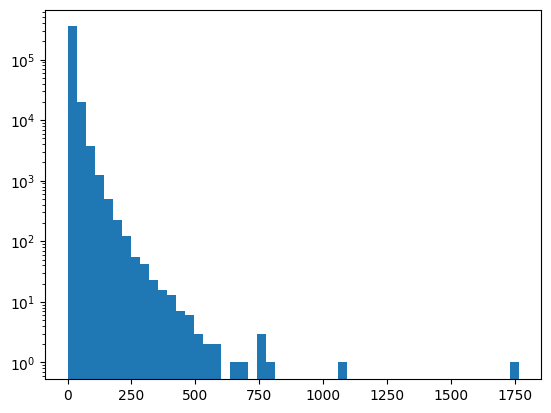

In [9]:
import matplotlib.pyplot as plt

plt.hist(ns_book7['대출건수'], bins = 50)
plt.yscale('log')
plt.show()

In [10]:
'''
샘플링
'''
np.random.seed(42)
sample_means = []
for _ in range(1000):
  m = ns_book7['대출건수'].sample(30).mean()
  sample_means.append(m)

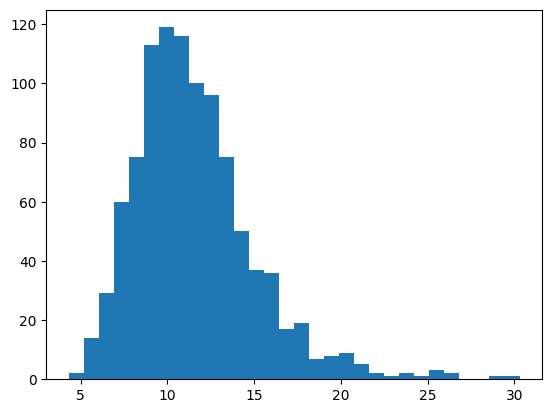

In [12]:
plt.hist(sample_means, bins = 30)
plt.show()

In [14]:
# 정규분포 형태의 평균과 모집단 평균이 유사
print(np.mean(sample_means))
print(ns_book7['대출건수'].mean())

11.539900000000001
11.593438968070707


In [15]:
np.random.seed(42)
sample_means = []
for _ in range(1000):
  m = ns_book7['대출건수'].sample(20).mean()
  sample_means.append(m)
np.mean(sample_means)

11.39945

In [16]:
np.random.seed(42)
sample_means = []
for _ in range(1000):
  m = ns_book7['대출건수'].sample(40).mean()
  sample_means.append(m)
np.mean(sample_means)

11.5613

In [ ]:
'''
샘플 개수가 많아지면 실제 평균과 유사해짐
'''

In [17]:
np.std(sample_means)

3.0355987564235165

In [18]:
np.std(ns_book7['대출건수'] / np.sqrt(40))

3.0483382518068334